# Guia 2.2

## Ejercicio 1

Implemente la convolución lineal mediante una sumatoria de convolución. Pruébela para convolucionar dos señales cualesquiera de longitud N muestras. Compare los resultados con los obtenidos mediante la función `conv(x,y)` y con la función `filter`.
La función `Y = filter(B,A,X)` implementa la ecuación en diferencias, para los coeficientes dados en los vectores A y B y la señal de entrada X, según:
$$ a(1)*y(n) = b(1)*x(n) + b(2)*x(n-1) + ... - a(2)*y(n-1) - ... $$
A partir de esto, determine los valores a ingresar en los vectores A y B para obtener la salida esperada.

<StemContainer object of 3 artists>

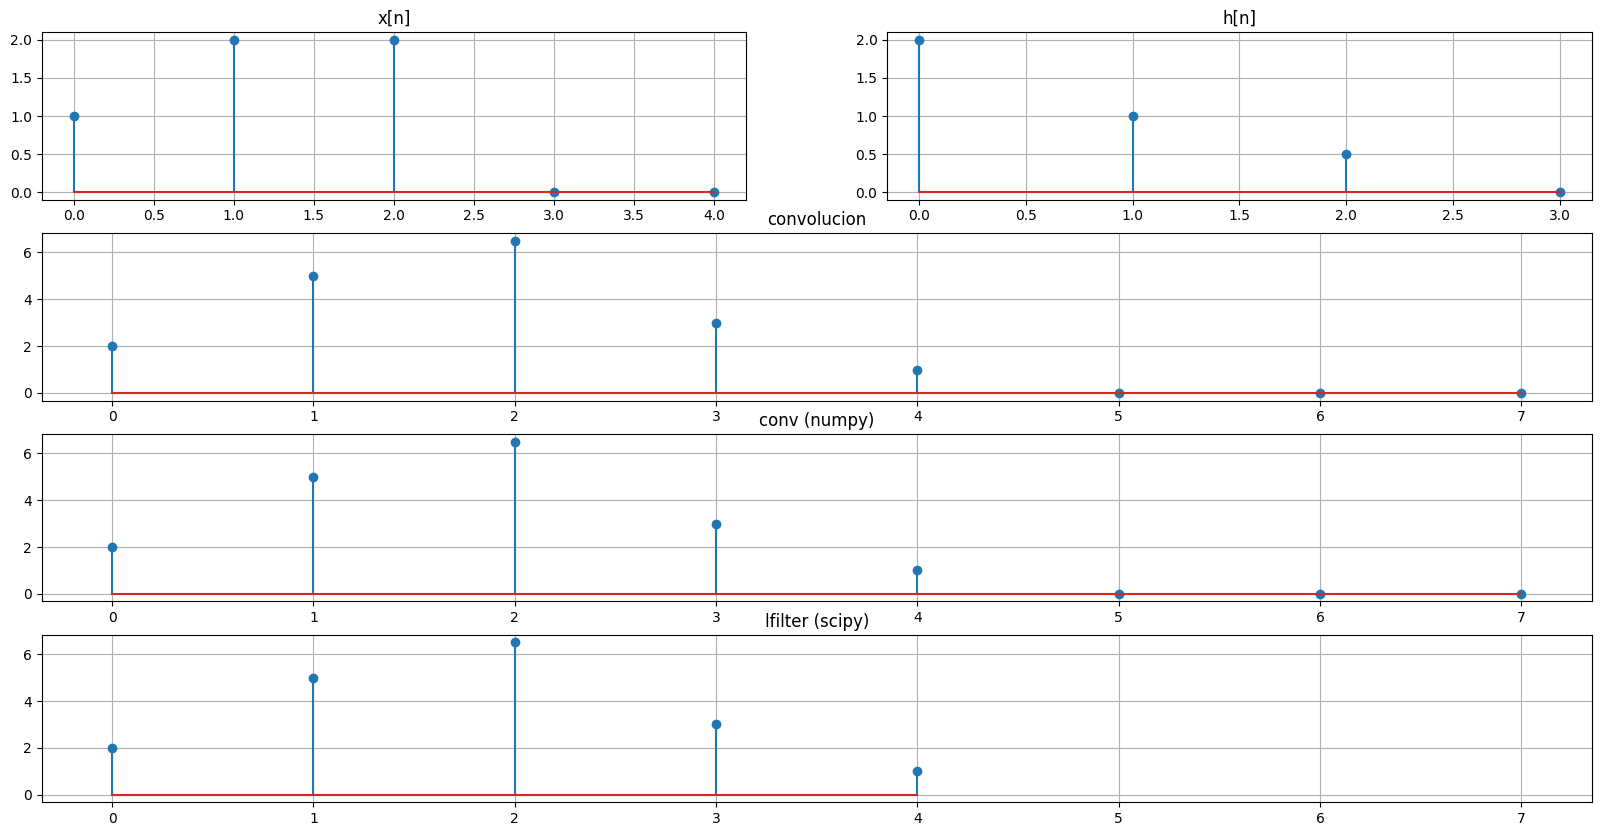

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

def convolucion(x,h):
    """realiza la convolucion x*h

    Args:
        x (_type_): senial de entrada
        h (_type_): respuesta al impulso

    Returns:
        _type_: senial de salida
    """
    # longitud de las seniales
    N = len(x)
    M = len(h)
    
    # inicializar vector de la suma
    c = [0]*(N+M-1)
    
    # SUMAR
    # 1- primer respuesta al impulso en n=0 escalado x[0]
    # ademas de desplazar y escalar, hay que rellenar con N-1 ceros
    c += x[0] * np.concatenate((h, np.zeros(N-1)))
    for n in range(1,len(x)-1):
        # se rellan concatenando con n ceros antes y N-1-n ceros despues
        c += x[n] * np.concatenate((np.zeros(n,dtype=float), h, np.zeros(N-1-n,dtype=float)))

    return c

# Ejemplo de Introduccion a las Señales y los Sistemas Discretos Figura 5.2
h = [2,1,0.5,0]
x = [1,2,2,0,0]

c = convolucion(x,h)

# graficar
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

ax = [[]]*5
ax[0] = plt.subplot2grid((4,2), (0,0))
ax[1] = plt.subplot2grid((4,2), (0,1), sharey=ax[0])
ax[2] = plt.subplot2grid((4,2), (1,0), colspan=2)
ax[3] = plt.subplot2grid((4,2), (2,0), colspan=2, sharex=ax[2])
ax[4] = plt.subplot2grid((4,2), (3,0), colspan=2, sharex=ax[2])

for i in range(5):
    ax[i].grid()

# x
ax[0].set_title('x[n]')
ax[0].stem(x)

# h
ax[1].set_title('h[n]')
ax[1].stem(h)

# convolucion
ax[2].set_title('convolucion')
ax[2].stem(c)

# conv
ax[3].set_title('conv (numpy)')
ax[3].stem(np.convolve(x,h))

# filter
A = [0]*len(x)
A[0] = 1    # A = [1,0,0,0,...]
B = h       # B = h
ax[4].set_title('lfilter (scipy)')
ax[4].stem(lfilter(B,A,x))